In [53]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import utils as u


In [54]:
# Read the data from the online_gaming_behavior_dataset.csv file into a Pandas DataFrame
orig_df = pd.read_csv("../Resources/online_gaming_behavior_dataset.csv")
# Review the DataFrame
orig_df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [55]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [56]:
## No null values
orig_df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

***** starting point accuracy predicted was at 0.89 on the majority class. During futher analysis of parameters such as rus, ros, cc, smoteenn, and smote, we found that the better accuracy was at 0.7288.

In [57]:
gaming_df = u.preprocess_and_clean(orig_df, smote=True)

In [58]:
X, y = u.split_data(gaming_df)

In [59]:
## No null values
gaming_df.isnull().sum()

Age                          0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
Gender_Female                0
Gender_Male                  0
Location_Asia                0
Location_Europe              0
Location_Other               0
Location_USA                 0
GameGenre_Action             0
GameGenre_RPG                0
GameGenre_Simulation         0
GameGenre_Sports             0
GameGenre_Strategy           0
InGamePurchases              0
dtype: int64

In [60]:
# Check unique values in the columns before encoding
print("Unique values in 'GameDifficulty':", gaming_df['GameDifficulty'].unique())
print("Unique values in 'EngagementLevel':", gaming_df['EngagementLevel'].unique())



Unique values in 'GameDifficulty': [1.         0.         2.         ... 0.47298669 1.84774307 1.91637432]
Unique values in 'EngagementLevel': [1.         2.         0.         ... 1.07443991 0.76350665 1.84774307]


In [61]:
gaming_df

,Age,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Gender_Male,Location_Asia,Location_Europe,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,InGamePurchases
0,43,1.000000,6,108,79,25,1.000000,0,1,0,0,1,0,0,0,0,0,1,0
1,29,1.000000,5,144,11,10,1.000000,1,0,0,0,0,1,0,0,0,0,1,0
2,22,0.000000,16,142,35,41,2.000000,1,0,0,0,0,1,0,0,0,1,0,0
3,35,0.000000,9,85,57,47,1.000000,0,1,0,0,0,1,1,0,0,0,0,1
4,33,1.000000,2,131,95,37,1.000000,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63981,44,0.000000,14,107,24,23,2.000000,0,0,0,0,0,0,0,0,0,0,0,1
63982,48,1.000000,14,29,45,28,1.000000,0,0,0,1,0,0,0,0,0,0,0,1
63983,46,1.847743,9,152,38,32,1.847743,0,1,0,1,0,0,0,0,0,0,0,1
63984,42,0.000000,14,17,84,47,1.000000,0,1,0,0,0,0,0,0,0,0,0,1


 Data Preprocessing

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Model Training and Evaluation

In [63]:
# Train an SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.72032256048009

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.87      0.76      7982
           1       0.82      0.57      0.67      8015

    accuracy                           0.72     15997
   macro avg       0.74      0.72      0.71     15997
weighted avg       0.74      0.72      0.71     15997



Model Optimization

The default parameters of SVM might not be the best for your data. Consider tuning hyperparameters like C, gamma, and kernel using GridSearchCV or RandomizedSearchCV.

In [64]:
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale')  # Example with custom parameters

For more evaluation we are using cross-validation.

confusion matrix provides more insight into how your model is performing for each class.

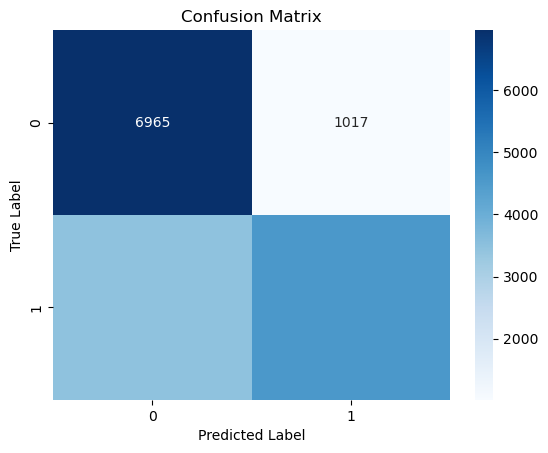

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [66]:
def calculate_cost_of_data_modeler(annual_salary, benefits_percentage, overhead_percentage, project_duration_years):
    # Calculate the total cost of the Data Modeler
    benefits_cost = annual_salary * benefits_percentage
    overhead_cost = annual_salary * overhead_percentage
    total_cost = (annual_salary + benefits_cost + overhead_cost) * project_duration_years
    return total_cost

def calculate_roi(total_cost, expected_revenue_increase, expected_cost_savings):
    # Calculate net profit
    net_profit = (expected_revenue_increase + expected_cost_savings) - total_cost
    # Calculate ROI
    roi = (net_profit / total_cost) * 100
    return roi, net_profit

# Inputs
annual_salary = 90000  # Annual salary of the Data Modeler
benefits_percentage = 0.25  # Benefits as a percentage of the salary (e.g., 25%)
overhead_percentage = 0.15  # Overhead as a percentage of the salary (e.g., 15%)
project_duration_years = 1  # Duration of the project in years

expected_revenue_increase = 200000  # Expected increase in revenue due to the Data Modeler's work
expected_cost_savings = 50000  # Expected cost savings due to the Data Modeler's work

# Calculate the total cost of the Data Modeler
total_cost = calculate_cost_of_data_modeler(annual_salary, benefits_percentage, overhead_percentage, project_duration_years)

# Calculate the ROI
roi, net_profit = calculate_roi(total_cost, expected_revenue_increase, expected_cost_savings)

# Output the results
print(f"Total Cost of Data Modeler: ${total_cost:.2f}")
print(f"Net Profit: ${net_profit:.2f}")
print(f"ROI: {roi:.2f}%")

Total Cost of Data Modeler: $126000.00
Net Profit: $124000.00
ROI: 98.41%
